# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [4]:
#Data
top5 = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False)[:5]

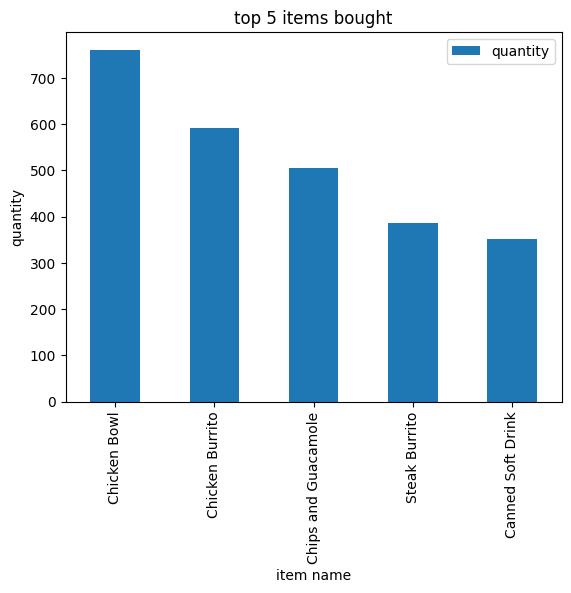

In [5]:
#Figure
plt.figure()
top5.plot(kind='bar')

plt.xlabel('item name')
plt.ylabel('quantity')
plt.title('top 5 items bought')
plt.legend()

plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [6]:
#Data
#strip the dollar sign and trailing space
chipo['item_price'] = [float(value[1:-1]) for value in chipo.item_price] #Method1
#chipo['item_price'] = chipo.item_price.str.slice(1).astype('float') #Method2
orders = chipo.groupby('order_id').sum()

x = orders['item_price']

y = orders['quantity']

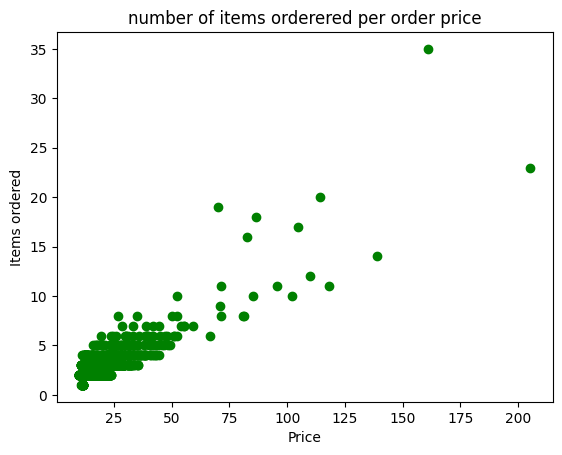

In [7]:
#Figure
plt.scatter(x, y, c='g')

plt.xlabel('Price')
plt.ylabel('Items ordered')
plt.title('number of items orderered per order price')

plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [39]:
#Data
chipo['Revenues'] = chipo['quantity'] * chipo['item_price']
chipo['item_cost'] = np.random.uniform(1, 10, 4622)
chipo['item_cost'] = round(chipo.item_cost, 2)
Revenues = chipo.groupby('item_name')['Revenues'].sum().sort_values(ascending=False).head()
Cost = chipo.groupby('item_name')['item_cost'].sum().sort_values(ascending=False).head()

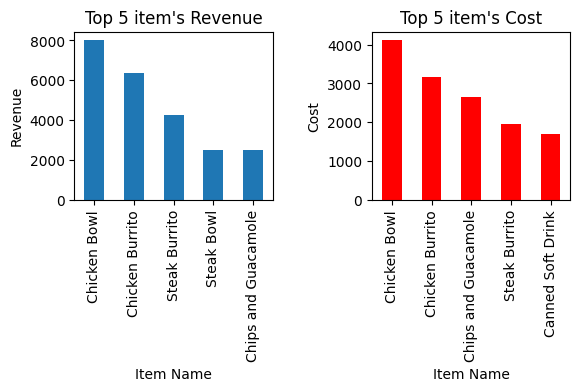

In [52]:
#Figure
plt.subplot(2,2,1)
Revenues.plot.bar()
plt.xlabel('Item Name')
plt.ylabel('Revenue')
plt.title("Top 5 item's Revenue")

plt.subplot(2,2,2)
plt.subplots_adjust(wspace=0.5)
Cost.plot.bar(color='r')
plt.xlabel('Item Name')
plt.ylabel('Cost')
plt.title("Top 5 item's Cost")

plt.show()

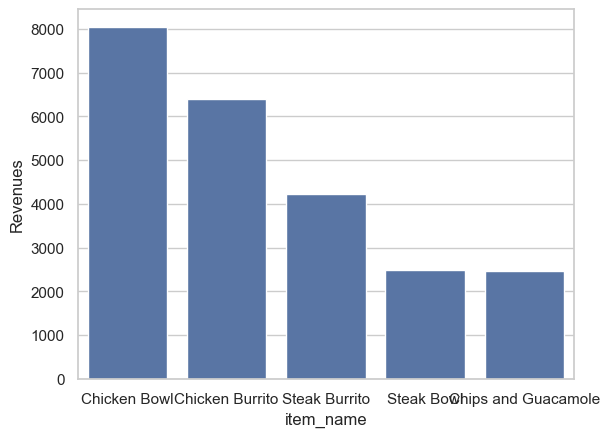

In [62]:
import seaborn as sns

sns.barplot(Revenues)

sns.set(style='whitegrid')